In [1]:
import pickle
import numpy as np
from gembed.multigraph import Multigraph

with open('results/auto_operators_embeddings.pkl', 'rb') as inobj:
    embeddings = pickle.load(inobj)
with open('results/auto_operators_graph.pkl', 'rb') as inobj:
    graph = pickle.load(inobj)

embeddings_dict = {t[0]:t[1] for t in embeddings }
embedding_nodes = [t[0] for t in embeddings]
embedding_vectors = [t[1] for t in embeddings]

In [2]:
graph.summary()

n nodes: 174
n relation types: 6
n connections: 395
5 most connected nodes: [(u'send_data', 7), (u'move_cursor', 7), (u'keywords', 6), (u'summarize', 6), (u'frequency', 6)]
5 least connected nodes (non-terminal): [(u'op', 1), (u'bool', 1), (u'multiply', 1), (u'trace_mad', 1), (u'logict_lt', 1)]
n terminal nodes: 78
5 most frequent relations: [(u'IS', 93), (u'RELATED_TO', 90), (u'TAKES_ARGTYPE', 73), (u'TAKES_ARGUMENTS', 69), (u'RETURNS', 69)]
5 least frequent relations: [(u'RELATED_TO', 90), (u'TAKES_ARGTYPE', 73), (u'TAKES_ARGUMENTS', 69), (u'RETURNS', 69), (u'SIMILAR_TO', 1)]
equivalent nodes: [[u'nlp_operator', u'image_operator', u'collection_operator', u'vector_operator', u'matrix_operator', u'logic_operator', u'char_operator', u'interface_operator', u'interactive_operator'], [u'zero', u'one', u'two', u'three', u'four'], [u'number', u'char', u'obj', u'coll', u'img', u'vec', u'mat', u'op', u'bool']]


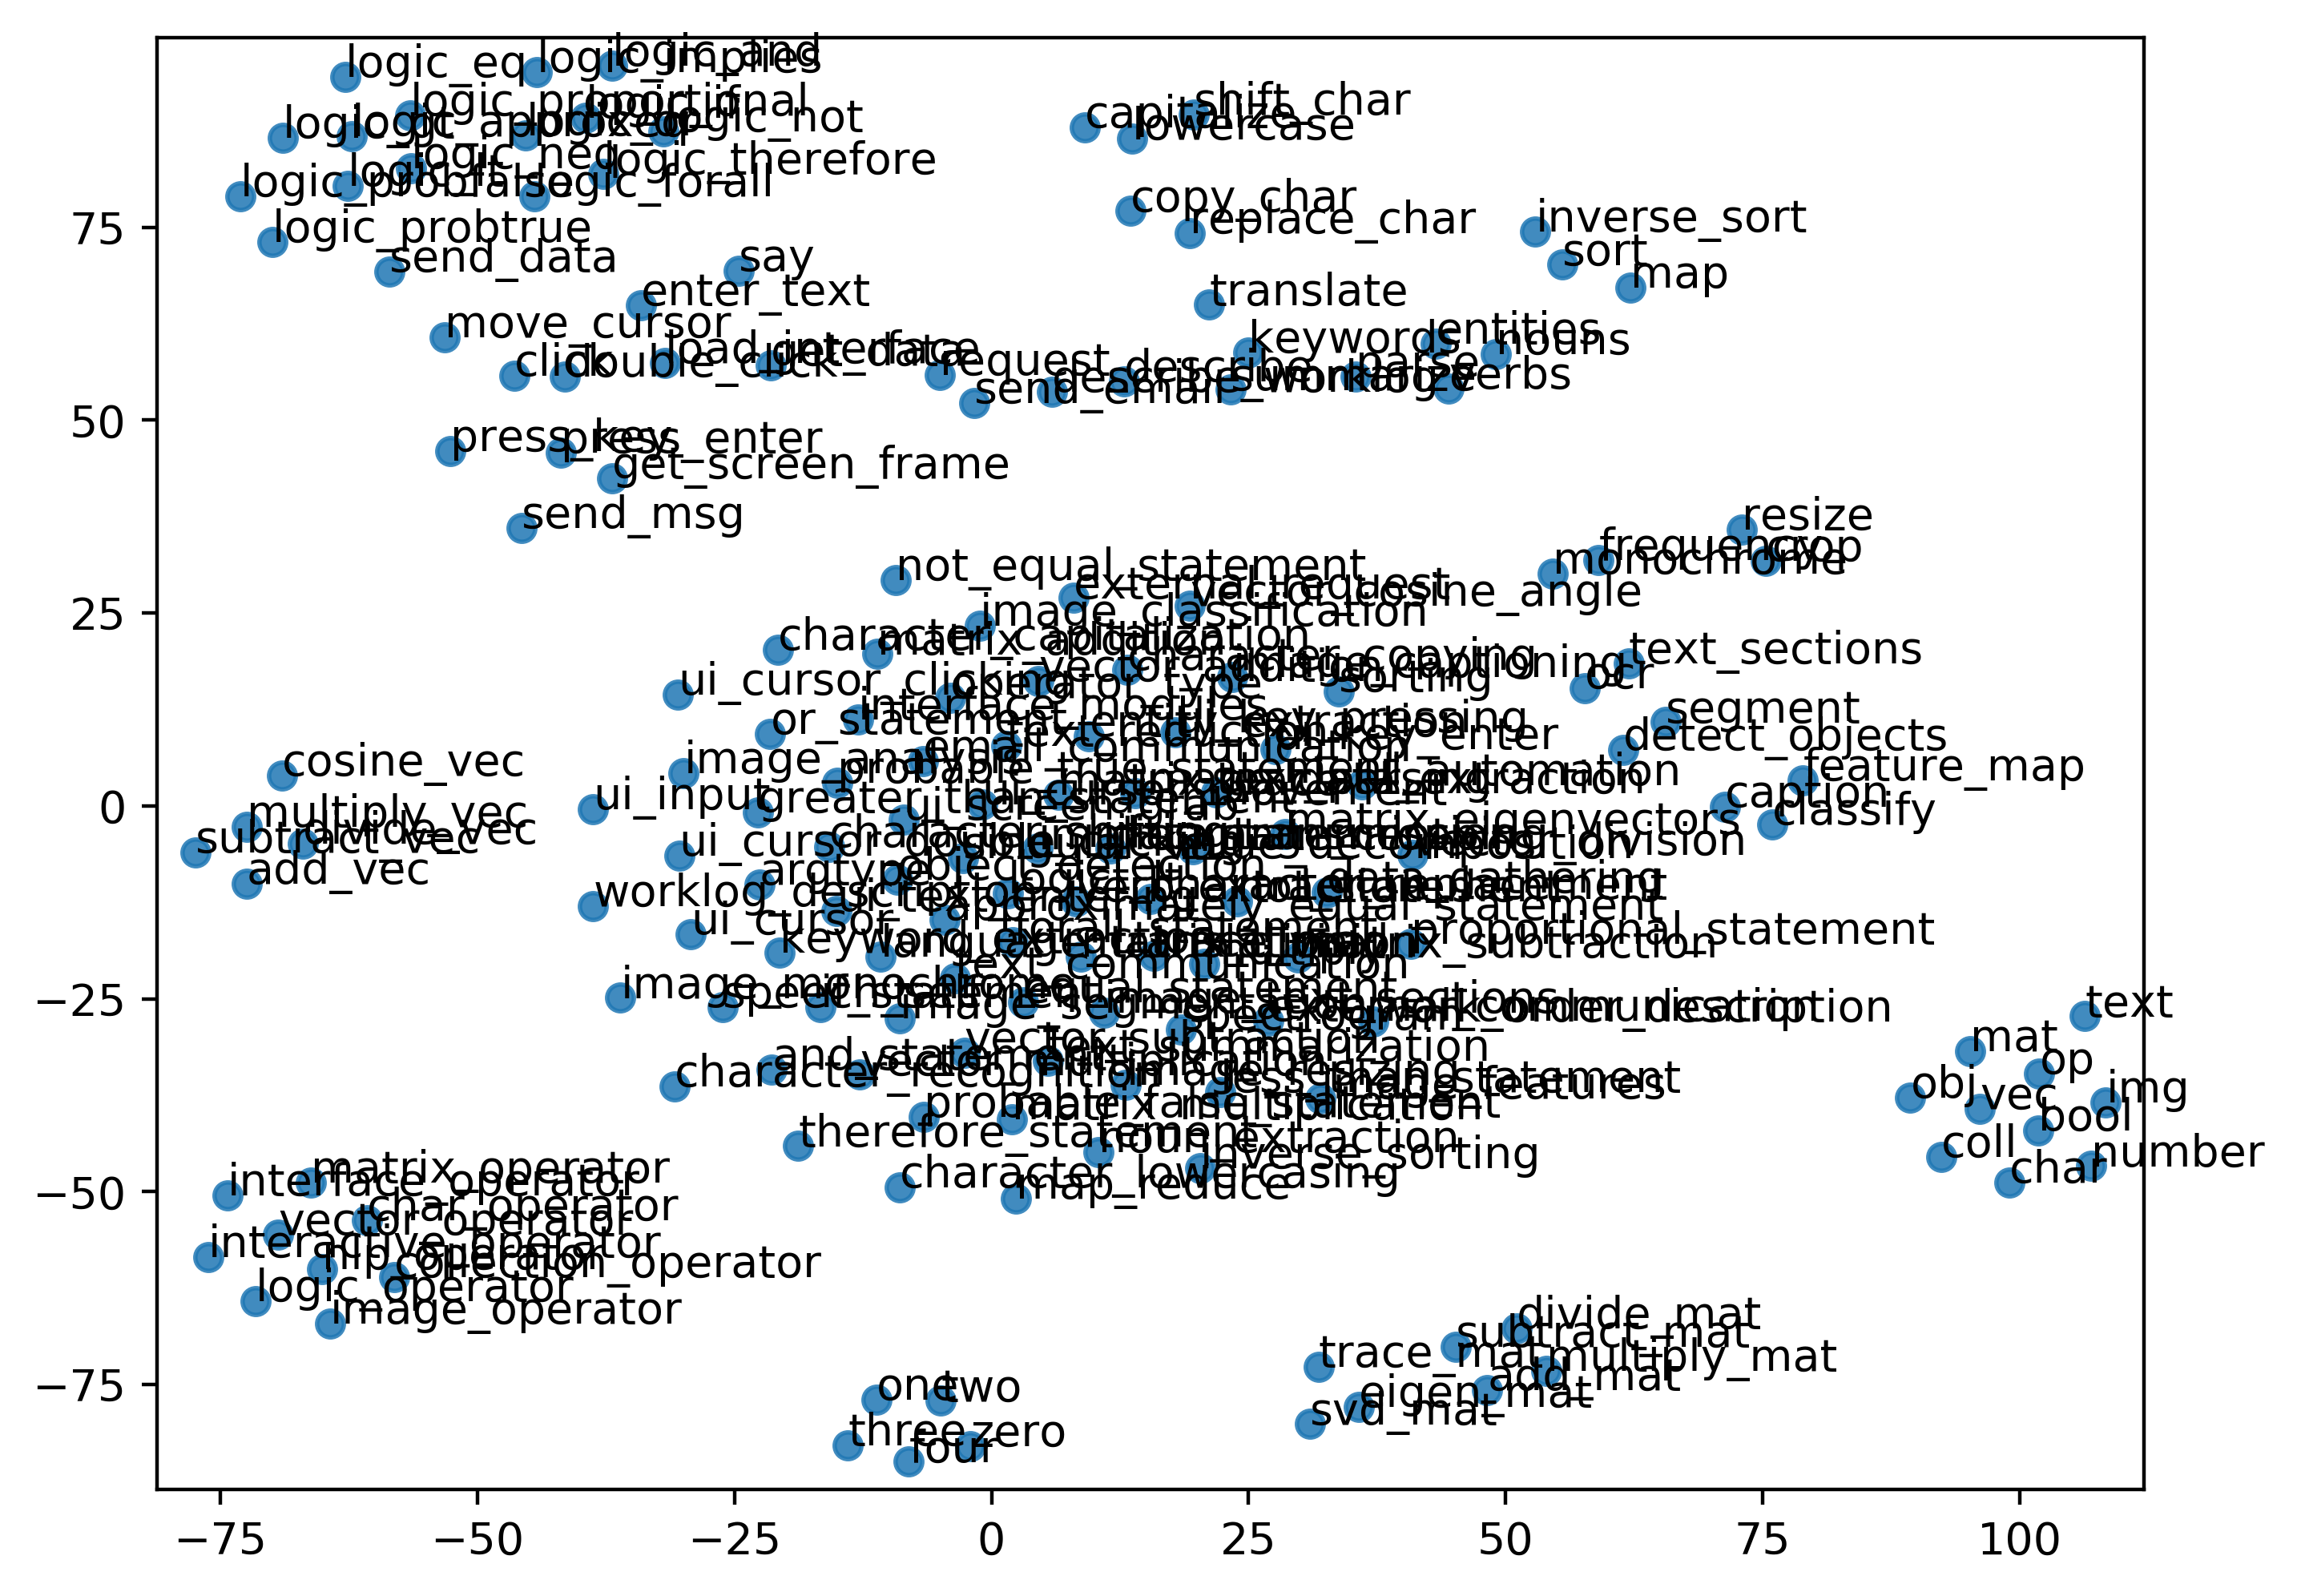

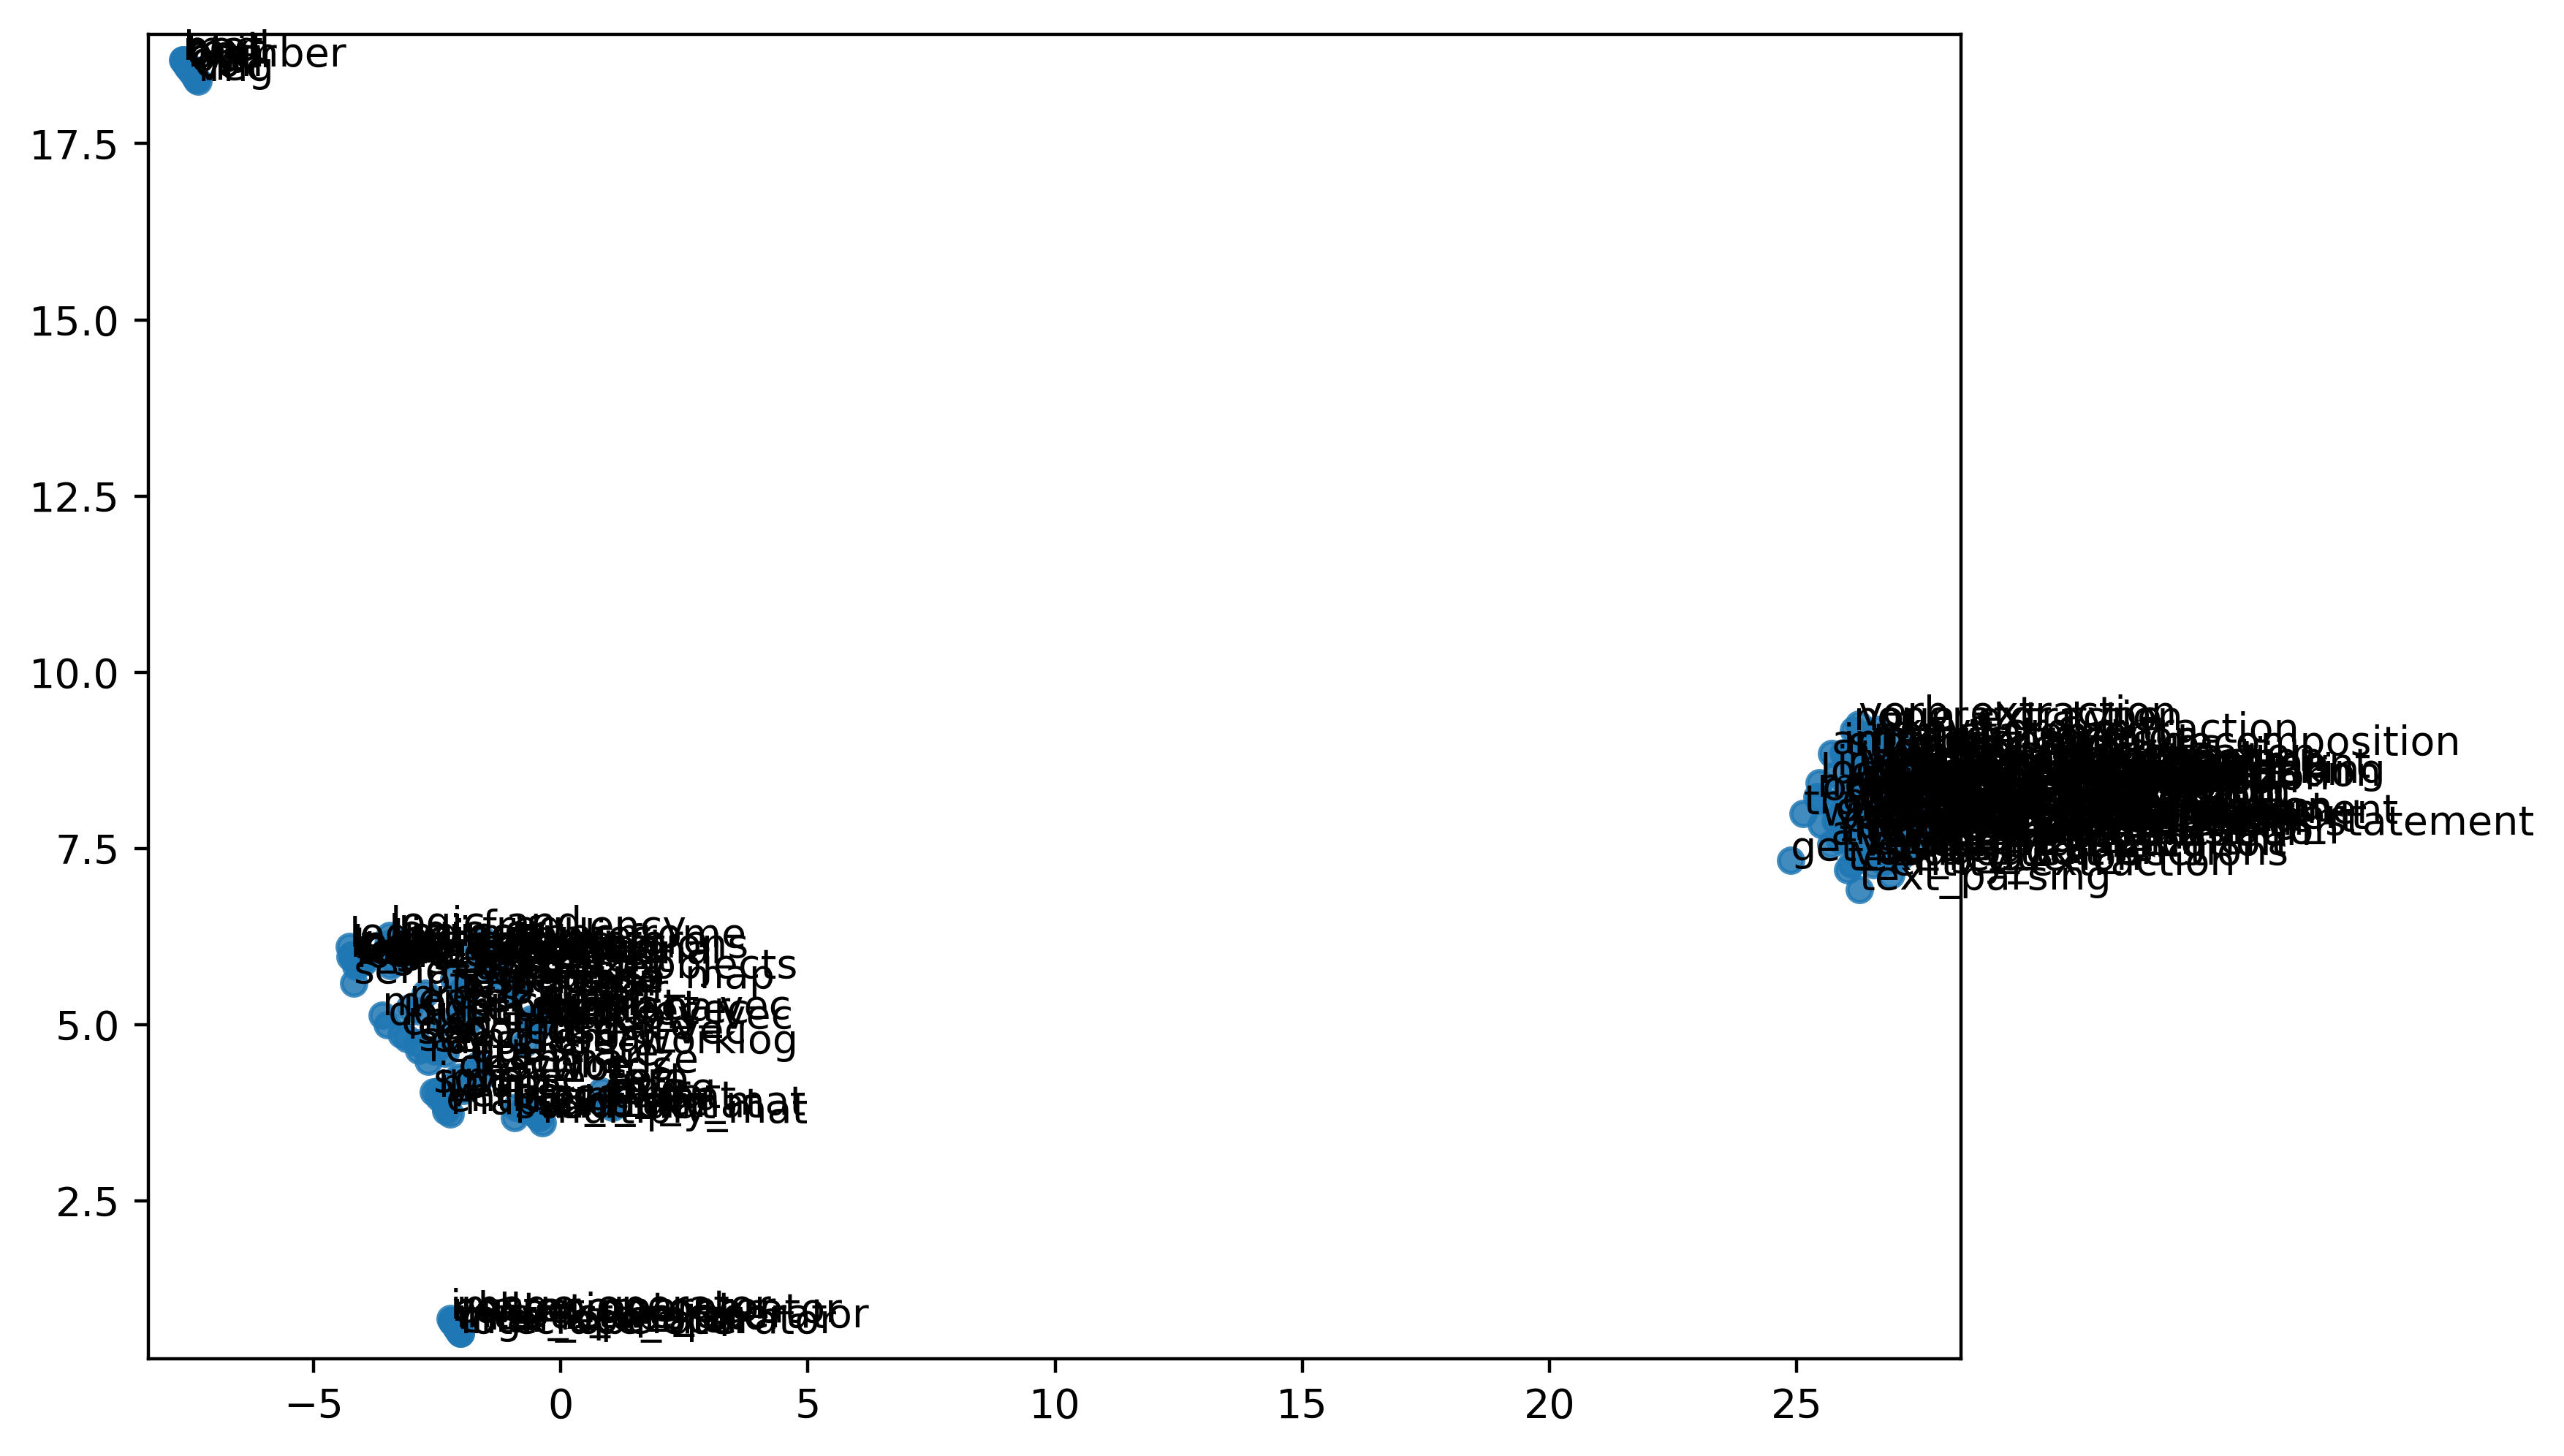

In [3]:
import gembed.plotting as plotting
%matplotlib inline

tnse_pts = plotting.tsne2D(embedding_vectors)
umap_pts = plotting.umap2D(embedding_vectors)

plotting.scatterplot2D(tnse_pts[:,0],tnse_pts[:,1],embedding_nodes)
plotting.scatterplot2D(umap_pts[:,0],umap_pts[:,1],embedding_nodes)


In [4]:
def get_category_embeddings(category, embeddings_dict):
    # category is a list a of types (source node name, category label)
    category_embeddings = []
    category_labels = []
    for i in category:
        category_embeddings.append(embeddings_dict[i[0]])
        category_labels.append(i[1])
    return (category_embeddings, category_labels)

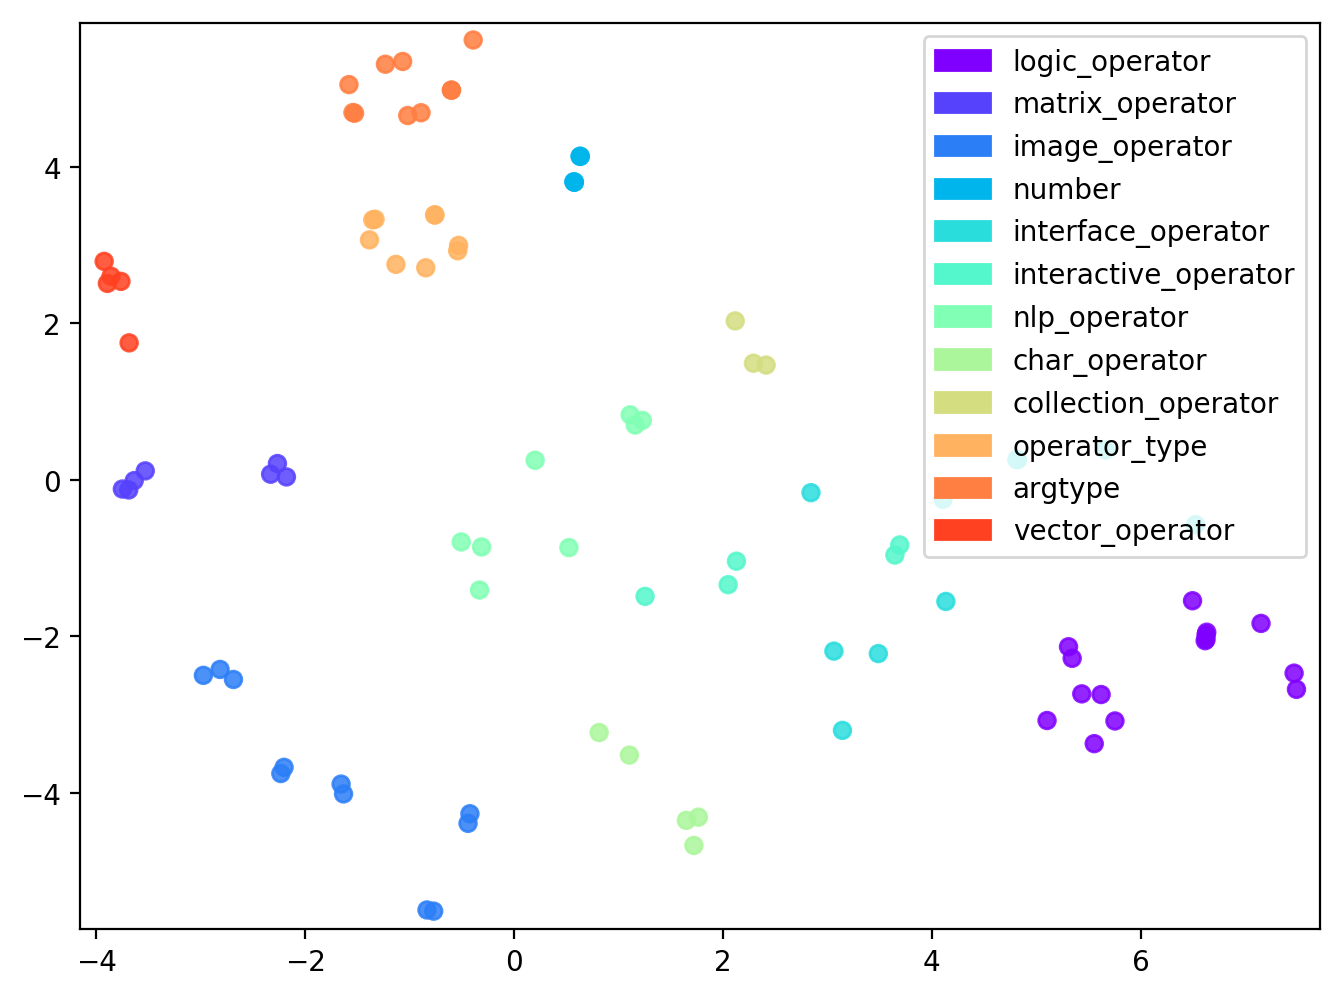

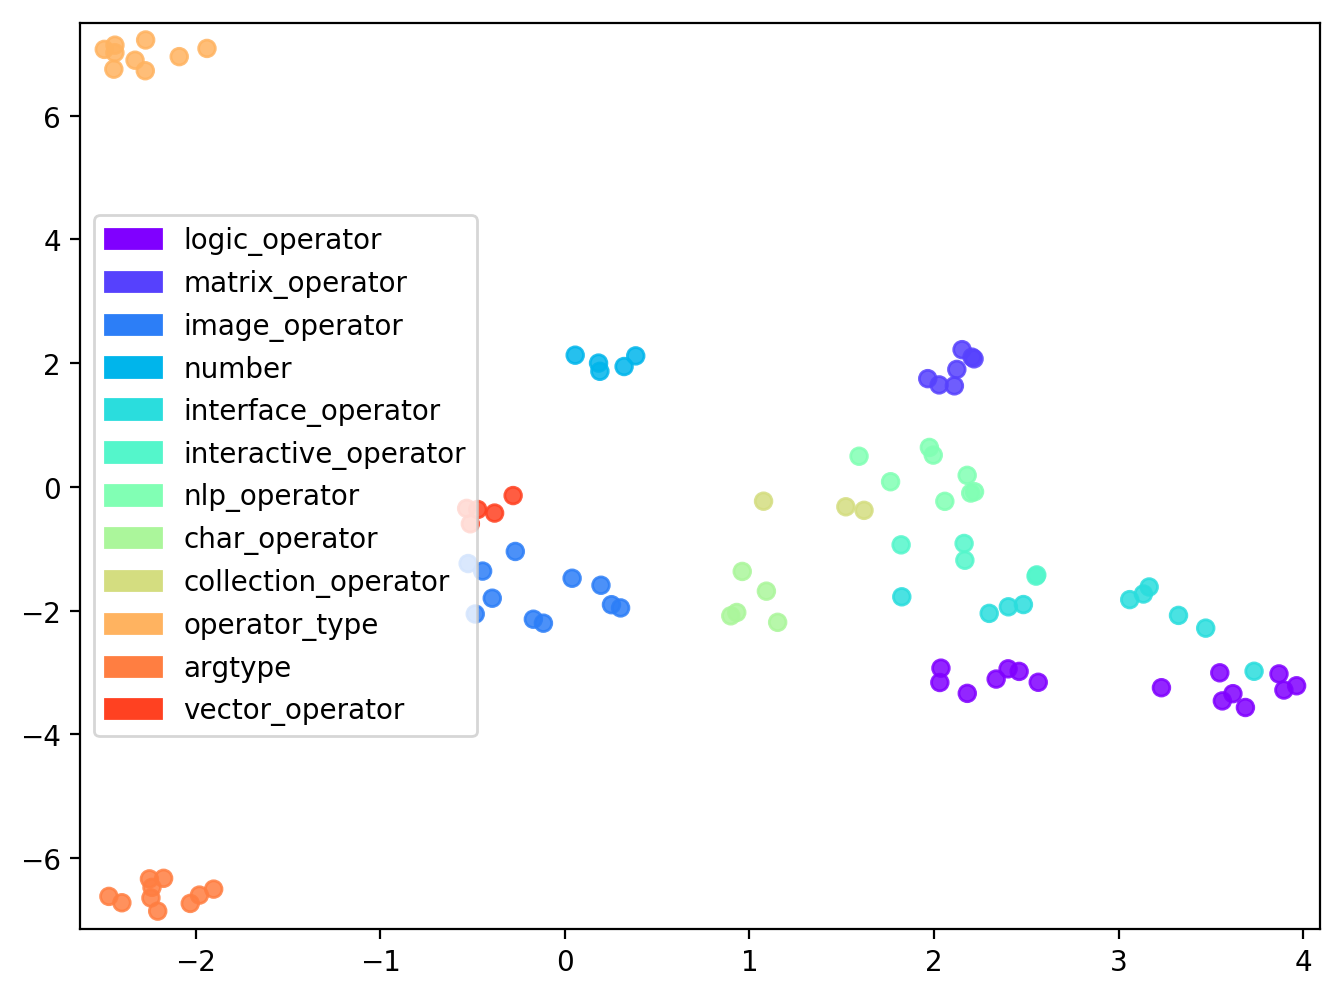

In [10]:
category_relation = graph.get_list_of_relation("IS")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsne2D(operator_embeds)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
umap_pts = plotting.umap2D(operator_embeds)
plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)

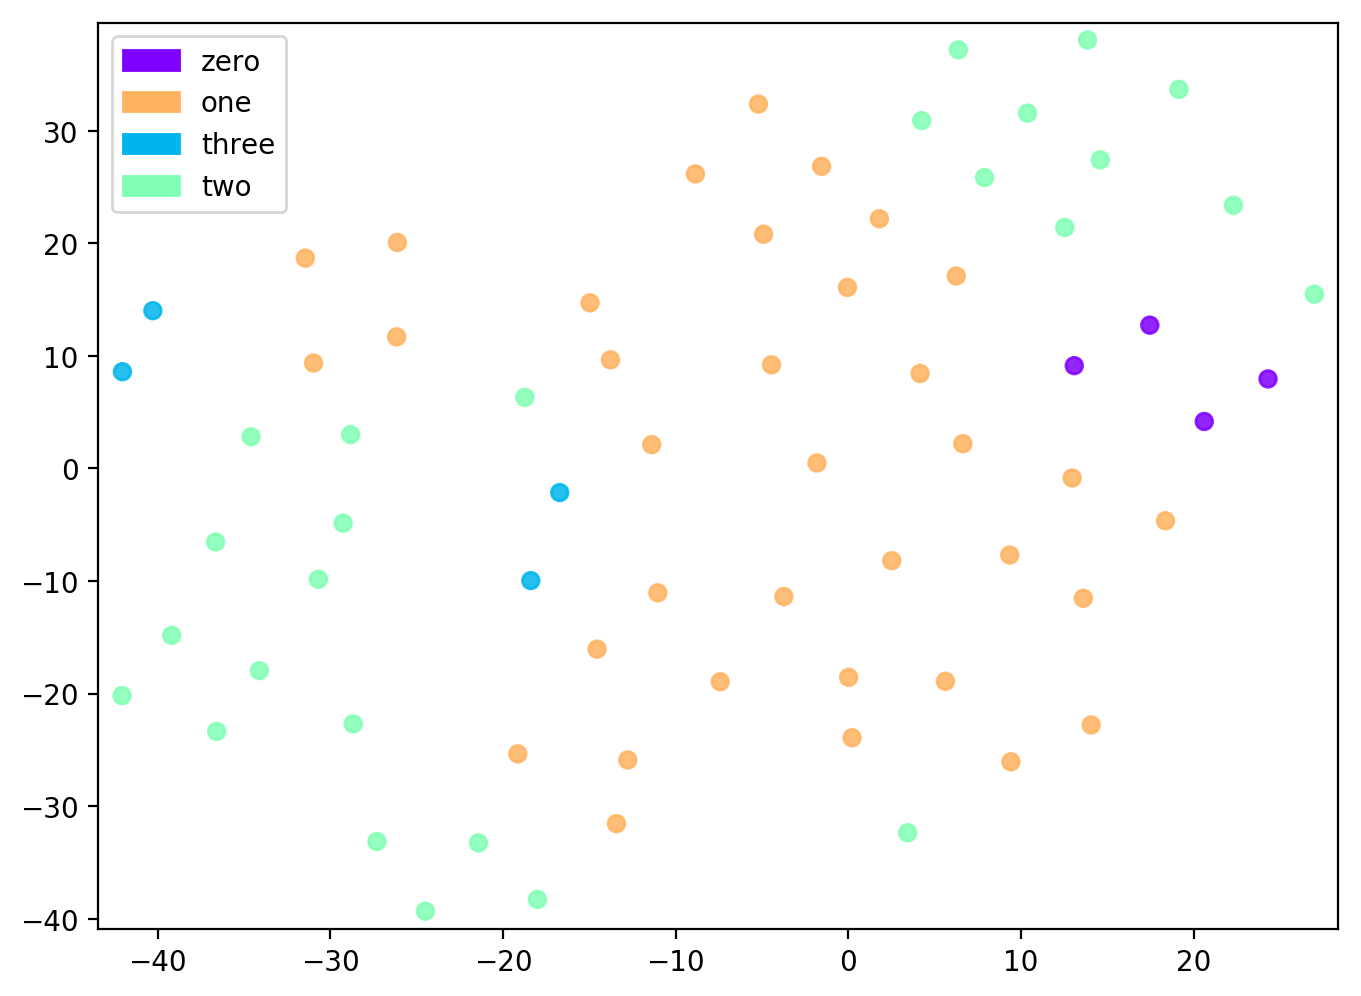

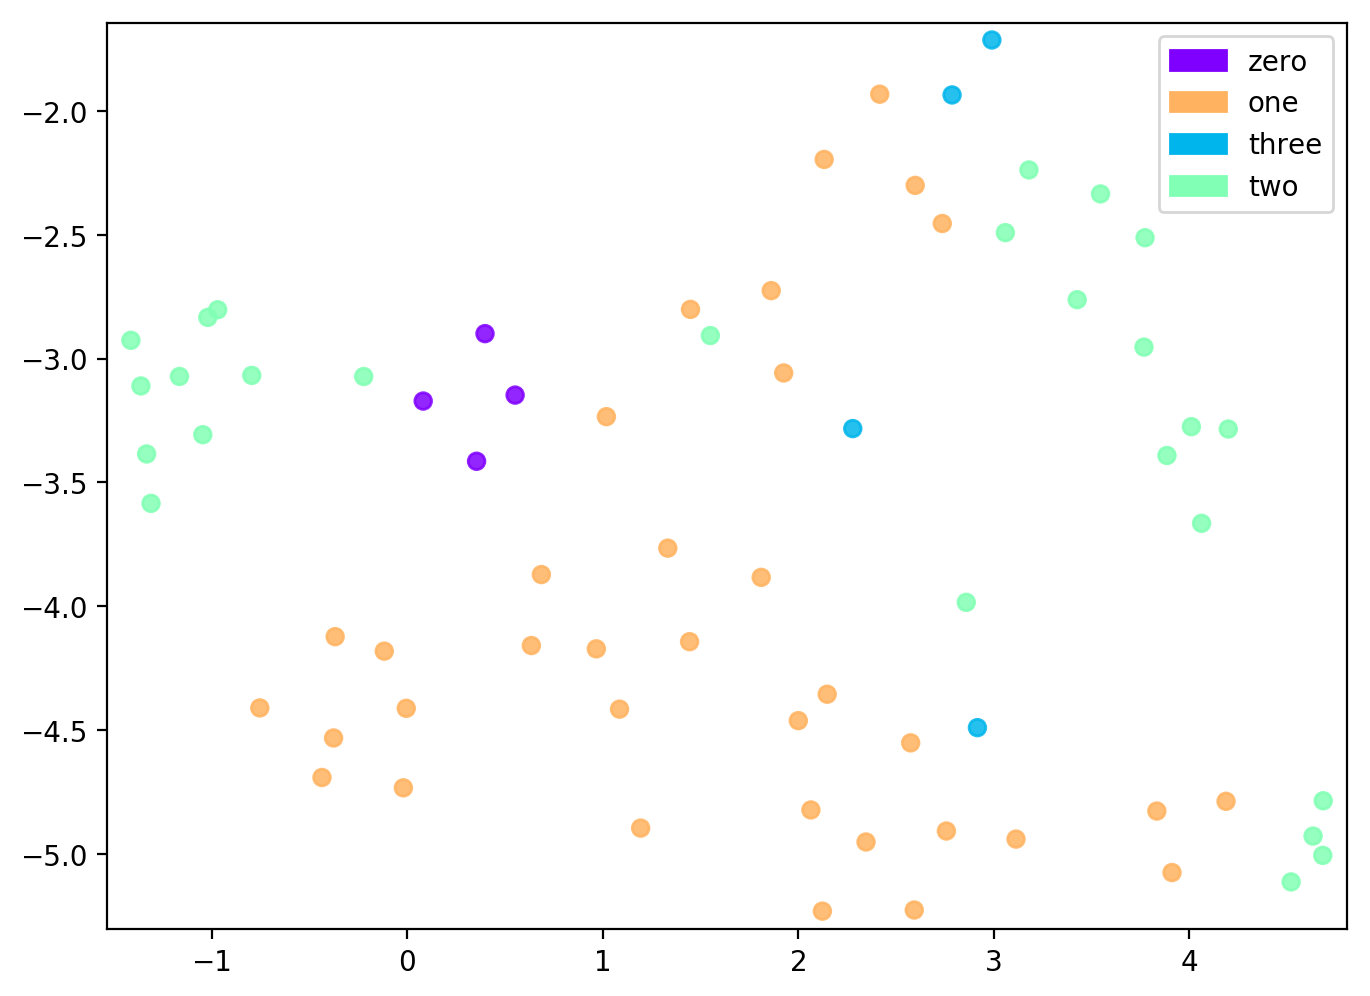

In [11]:
category_relation = graph.get_list_of_relation("TAKES_ARGUMENTS")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsne2D(operator_embeds)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
umap_pts = plotting.umap2D(operator_embeds)
plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)

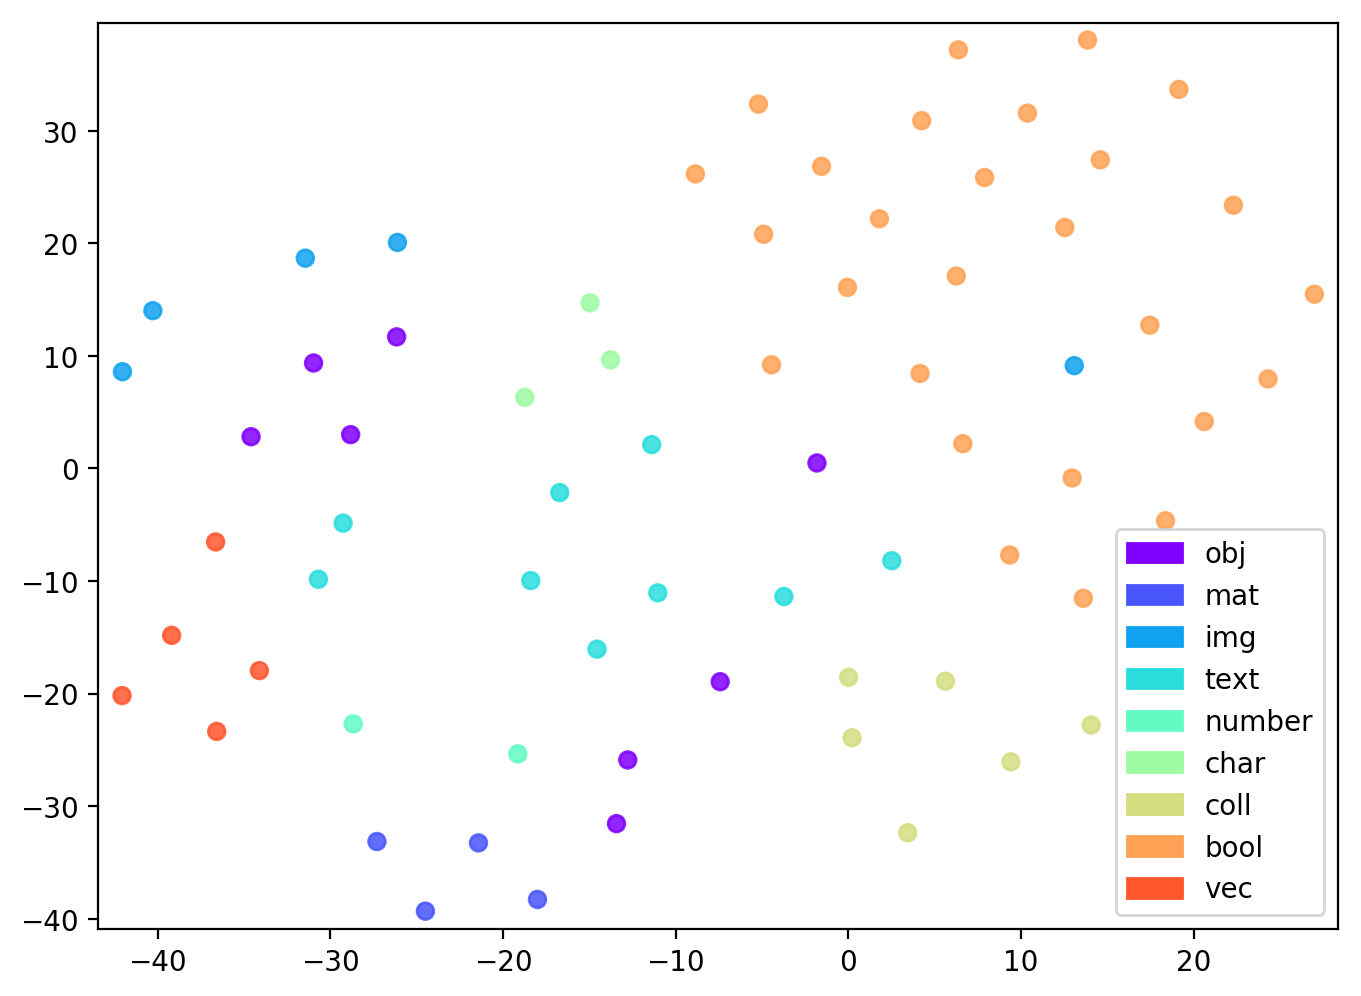

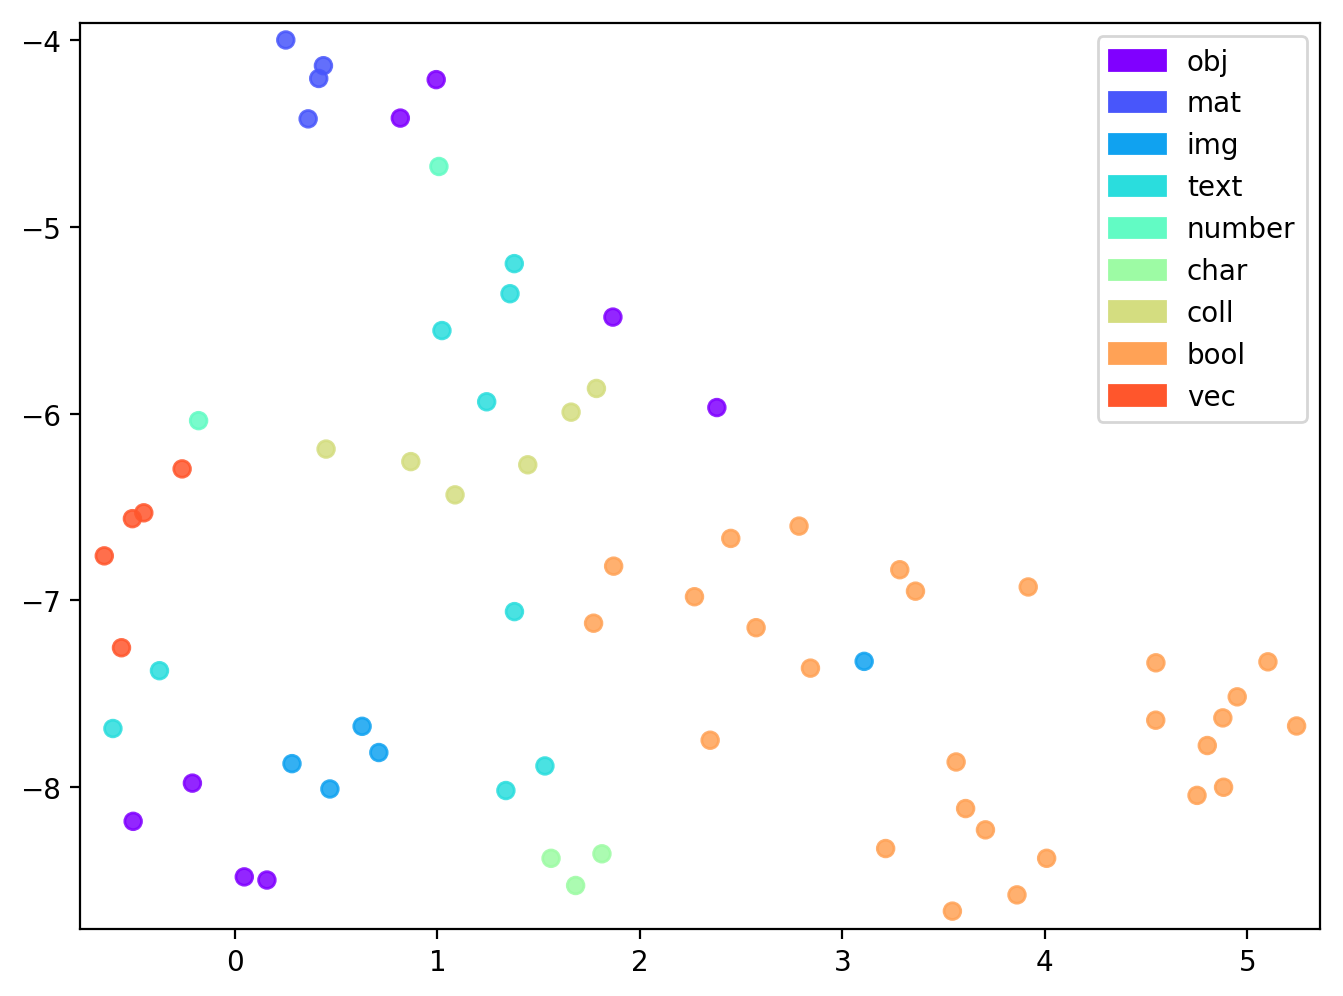

In [12]:
category_relation = graph.get_list_of_relation("RETURNS")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsne2D(operator_embeds)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
umap_pts = plotting.umap2D(operator_embeds)
plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)

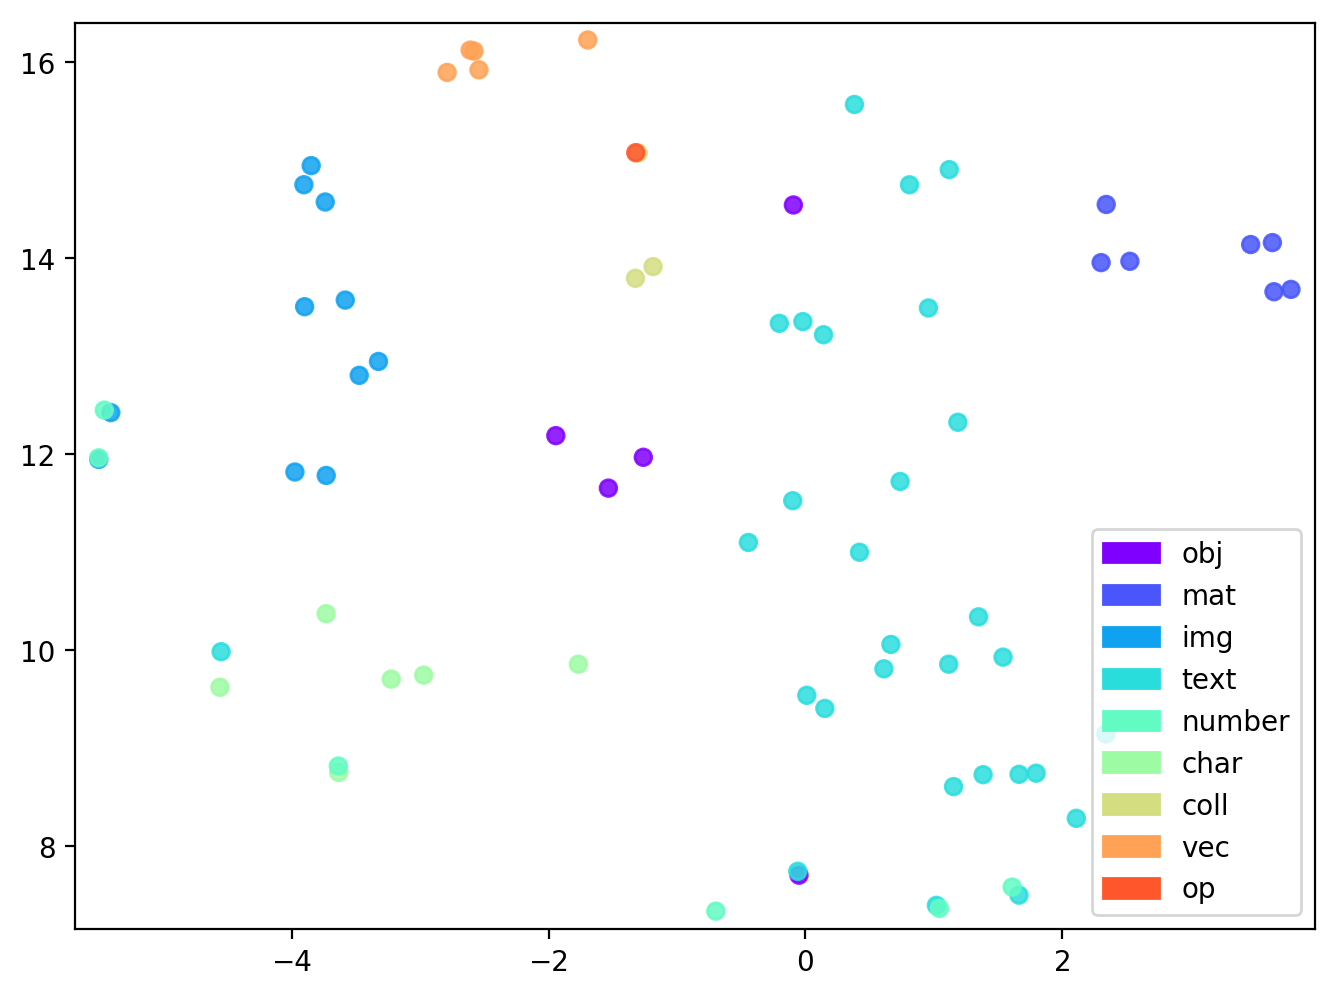

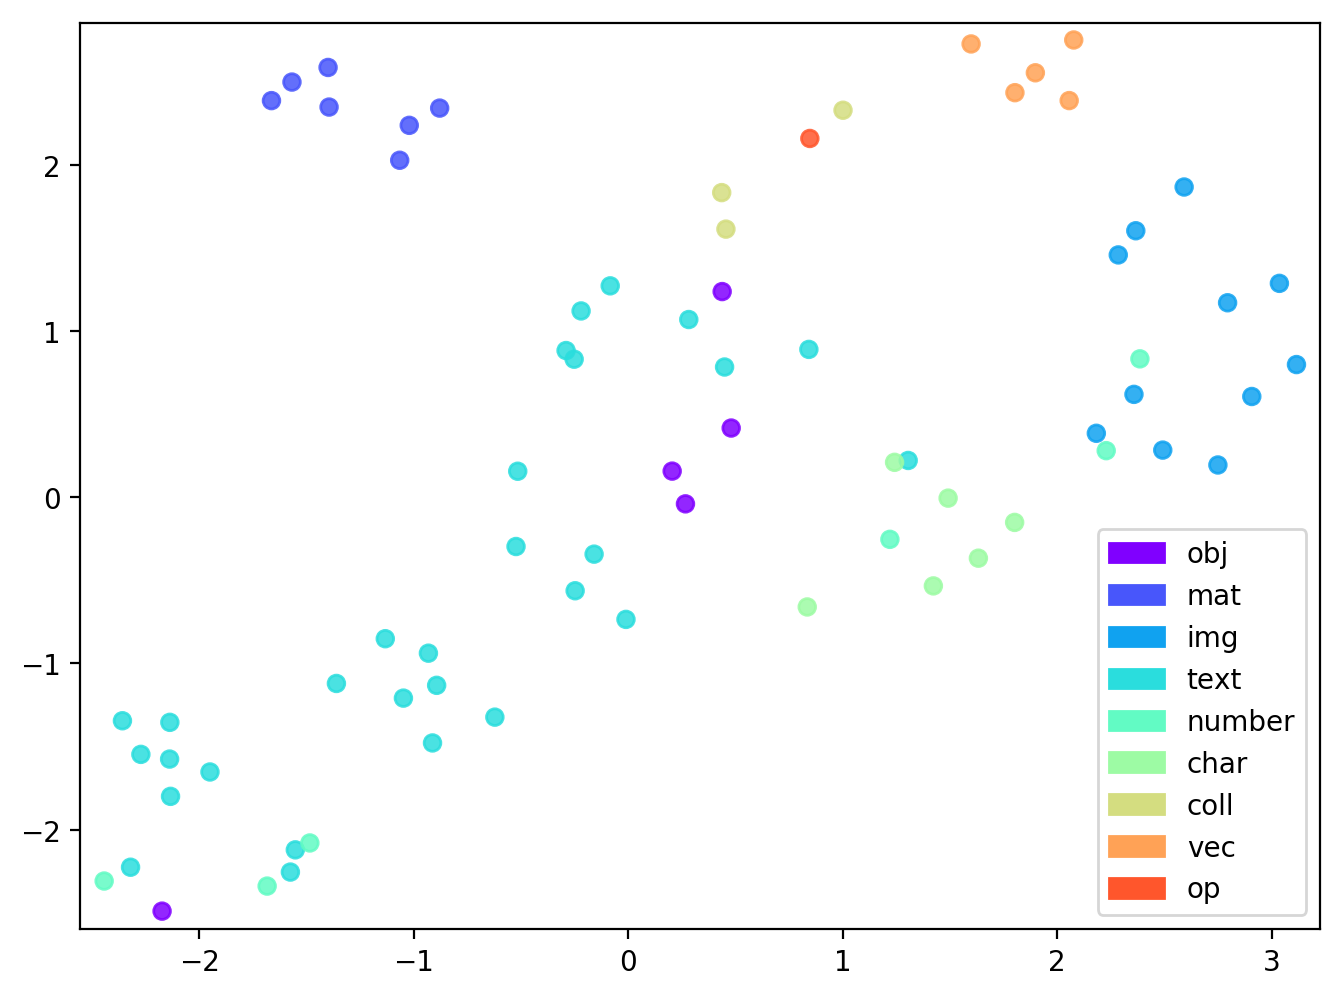

In [13]:
category_relation = graph.get_list_of_relation("TAKES_ARGTYPE")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsne2D(operator_embeds)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
umap_pts = plotting.umap2D(operator_embeds)
plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)